## DatafestAfrica ML Hackathon

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = 'darkgrid')
sns.set_context('paper')
base_color = sns.color_palette()[0]

%matplotlib inline

## Table of Content( to be worked on later)
Abstract

wrangling

eda

## Abstract
 The aim of this project is to train a Machine Learning model to help a Financial Industry predict who is likely to complete an E-process application.

## Preliminary  Wrangling

In [3]:
# downloading the datasets programmatically (from Zion)
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

We will be performing our wrangling on the train dataset.

### Assessing

In [4]:
# creating a simple function to return basic information on the dataset
def info(df):
    print(df.shape),
    print('*' *40),
    print(df.info())
    print('*' *40)
    print(df.nunique())
    
info(train)
train.sample(5)

(12516, 21)
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              12516 non-null  int64  
 1   age                   12516 non-null  int64  
 2   pay_schedule          12516 non-null  object 
 3   home_owner            12516 non-null  int64  
 4   income                12516 non-null  int64  
 5   months_employed       12516 non-null  int64  
 6   years_employed        12516 non-null  int64  
 7   current_address_year  12516 non-null  int64  
 8   personal_account_m    12516 non-null  int64  
 9   personal_account_y    12516 non-null  int64  
 10  has_debt              12516 non-null  int64  
 11  amount_requested      12516 non-null  int64  
 12  risk_score            12516 non-null  int64  
 13  risk_score_2          12516 non-null  float64
 14  risk_score_3     

Entry_id  age  pay_schedule  home_owner  income  months_employed  \
8225    6516387   53     bi-weekly           0    6580                0   
11374   1356734   33  semi-monthly           1    5245                0   
3763    2858964   42        weekly           1    3770                1   
11655   8535255   58     bi-weekly           1    4680                0   
9465    6098053   33     bi-weekly           0    1695                0   

       years_employed  current_address_year  personal_account_m  \
8225                4                     5                   7   
11374               2                     0                   7   
3763                8                     8                   2   
11655               2                     3                   5   
9465                5                     9                   2   

       personal_account_y  ...  amount_requested  risk_score  risk_score_2  \
8225                    3  ...              1100       72450      0.636979   
11374                   3  ...               700       72750      0.767004   
3763                    7  ...               600       45450      0.655511   
11655                   3  ...               400       95900      0.821906   
9465                    7  ...               500       59850      0.759294   

       risk_score_3  risk_score_4  risk_score_5  ext_quality_score  \
8225       0.873350      0.653664      0.725736           0.498138   
11374      0.985377      0.462496      0.689427           0.776121   
3763       0.897906      0.581544      0.642913           0.700943   
11655      0.867716      0.750369      0.829022           0.861019   
9465       0.901374      0.453519      0.732491           0.863283   

       ext_quality_score_2  inquiries_last_month  e_signed  
8225              0.798138                    11         0  
11374             0.676121                     9         1  
3763              0.800943                     6         0  
11655             0.561019                     5         1  
9465              0.863283                     3         1  

[5 rows x 21 columns]

In [5]:
# creating a dataframe to house key numerical variables in the dataset 
num_vars = pd.DataFrame()
num_vars['age'] = train['age']
num_vars['income'] = train['income']
num_vars['amount_requested'] = train['amount_requested']
num_vars['risk_score'] = train['risk_score']

In [6]:
# this returns summary statistics on key numerical variables in the dataset.
num_vars.describe()

age        income  amount_requested    risk_score
count  12516.000000  12516.000000      12516.000000  12516.000000
mean      43.026766   3654.110658        950.251518  61133.401246
std       11.865891   1508.072163        706.915146  15396.809340
min       18.000000    905.000000        350.000000   2100.000000
25%       34.000000   2575.000000        600.000000  49450.000000
50%       42.000000   3255.000000        700.000000  61200.000000
75%       51.000000   4661.250000       1100.000000  72750.000000
max       96.000000   9985.000000      10200.000000  99750.000000

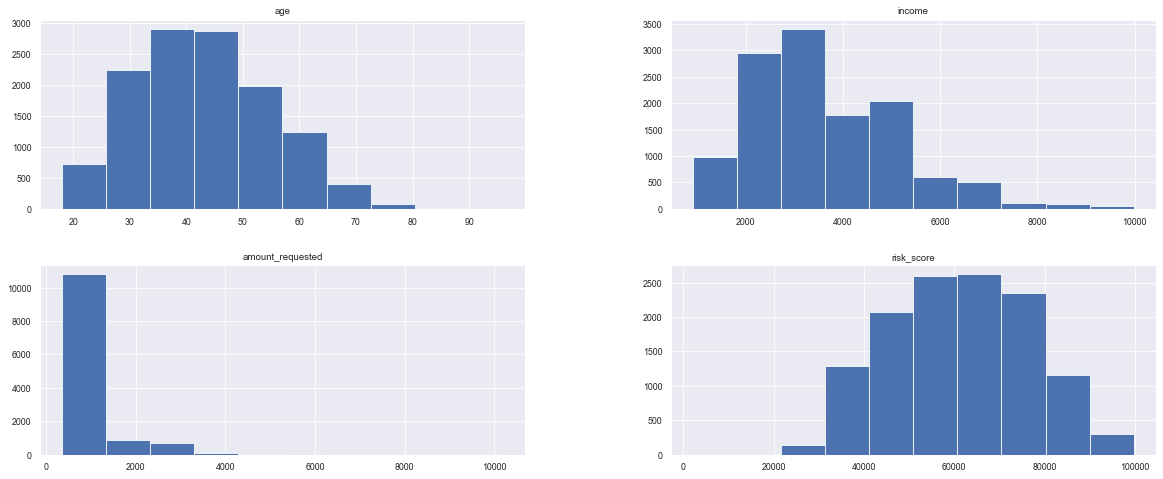

In [7]:
# creating a simple visualization of these numerical variables
num_vars.hist(figsize=(20, 8));

In [8]:
train.age.value_counts()

43    402
37    392
42    388
39    384
34    382
     ... 
86      2
96      1
83      1
89      1
87      1
Name: age, Length: 72, dtype: int64

### Quick Observations

- Most customers appear to be middle aged, as the mean age is 43 years.
- 

In [9]:
# checking key columns for dulicate entries
train.Entry_id.duplicated().value_counts()

False    12510
True         6
Name: Entry_id, dtype: int64

### Issues

- duplicate entries in the Entry_id column
- The months_employed and years_employed columns should be merged into 1

### Cleaning

Before we commence cleaning, it is best to create a copy of the dataset upon which the cleaning will be done.

In [10]:
train_copy = train.copy()

#### 1. Duplicate entries in the Entry_id column

#### Define: The entry id column contains some duplicate entries that need to be dropped.

#### Code 

In [11]:
#test
sum(train_copy.Entry_id.duplicated())

6

In [12]:
train_copy.drop_duplicates(subset= 'Entry_id', inplace = True)

In [13]:
# confirmation 
sum(train_copy.Entry_id.duplicated())

0

#### 2. The months_employed and years_employed columns should be merged into 1

#### Define: the columns should be merged to make it easier to work with them.

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12510 entries, 0 to 12515
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              12510 non-null  int64  
 1   age                   12510 non-null  int64  
 2   pay_schedule          12510 non-null  object 
 3   home_owner            12510 non-null  int64  
 4   income                12510 non-null  int64  
 5   months_employed       12510 non-null  int64  
 6   years_employed        12510 non-null  int64  
 7   current_address_year  12510 non-null  int64  
 8   personal_account_m    12510 non-null  int64  
 9   personal_account_y    12510 non-null  int64  
 10  has_debt              12510 non-null  int64  
 11  amount_requested      12510 non-null  int64  
 12  risk_score            12510 non-null  int64  
 13  risk_score_2          12510 non-null  float64
 14  risk_score_3          12510 non-null  float64
 15  risk_score_4       

### Structure of the dataset

The train dataset intially contained 12,516 rows, and 21 columns. After assessing and cleaning the data, it now contains 12,510 rows and 21 columns.

## <u>Exploratory Data Analysis.

In this section of the project, we are going to be exploring multiple variables from the train dataset.

## Univariate Exploration

### Distribution of ages in the dataset.

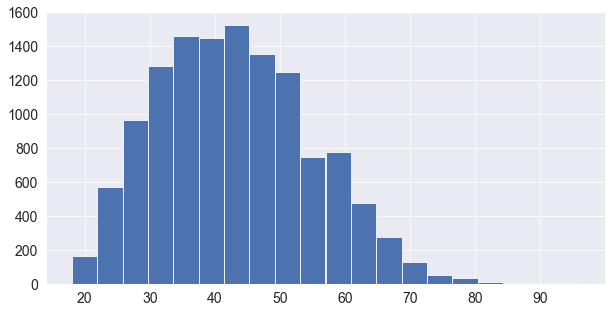

In [28]:
plt.figure(figsize=(10,5))
plt.hist(train.age, color = base_color, bins = 20);
plt.yticks(fontsize=14)
plt.xticks(fontsize=14);

The age distribution is slightly skewed right 